In [1]:
#Libs
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



2025-07-26 06:29:27.042693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753511367.258283      18 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753511367.318381      18 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Setup

In [2]:
df = pd.read_csv('/kaggle/input/ecg-dataset/ecg.csv',header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,955,954,954,956,958,955,955,953,954,956,...,941,940,940,939,941,941,942,937,938,0
1,952,953,953,953,949,947,953,952,953,952,...,946,949,951,947,948,946,949,949,951,0
2,955,948,952,952,955,955,954,953,955,958,...,939,934,935,934,937,935,930,933,932,0
3,957,958,958,958,956,956,956,959,959,959,...,939,939,942,942,940,938,935,936,937,0
4,958,958,960,960,958,958,959,961,961,961,...,944,946,949,949,950,947,946,946,946,0
5,952,954,956,955,955,953,952,952,951,955,...,943,938,941,942,941,938,935,931,932,0
6,954,952,952,954,953,956,955,953,953,953,...,944,943,940,938,939,942,942,943,941,0
7,960,961,960,957,957,960,959,961,960,960,...,948,948,948,949,946,945,947,947,949,0
8,960,960,960,962,963,966,967,966,963,962,...,957,954,951,948,947,953,952,953,950,0
9,961,964,962,961,963,962,960,962,964,965,...,940,938,938,939,940,938,935,931,933,0


In [3]:
#Adding Label
adding_columns = [f'f{i}' for i in range(0, 188)] + ['label']
df.columns = adding_columns

In [4]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f179,f180,f181,f182,f183,f184,f185,f186,f187,label
0,955,954,954,956,958,955,955,953,954,956,...,941,940,940,939,941,941,942,937,938,0
1,952,953,953,953,949,947,953,952,953,952,...,946,949,951,947,948,946,949,949,951,0
2,955,948,952,952,955,955,954,953,955,958,...,939,934,935,934,937,935,930,933,932,0
3,957,958,958,958,956,956,956,959,959,959,...,939,939,942,942,940,938,935,936,937,0
4,958,958,960,960,958,958,959,961,961,961,...,944,946,949,949,950,947,946,946,946,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,910,936,890,879,886,893,905,961,852,894,...,871,921,919,890,871,871,882,931,891,1
4021,901,903,879,914,954,952,935,915,851,907,...,971,884,901,928,893,900,893,909,885,1
4022,913,861,891,920,887,902,915,867,876,877,...,928,896,882,914,955,912,905,896,929,1
4023,861,905,877,935,869,863,878,921,910,888,...,901,906,891,855,924,883,897,903,918,1


# Exploratory Data Analysis (EDA)

In [5]:
#EDA Data Analysis
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f179,f180,f181,f182,f183,f184,f185,f186,f187,label
count,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,...,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000
mean,938.191801,941.620621,941.786087,941.021366,942.141863,943.685714,943.269068,942.465093,944.296149,944.960000,...,938.907578,939.242981,940.028820,941.001739,943.079006,940.812919,942.432547,943.562484,943.868820,0.444472
std,45.274977,44.146376,44.649588,45.018193,45.364692,43.374603,43.830052,47.810363,44.242416,42.819471,...,68.463388,70.327547,70.129252,71.347045,70.885956,74.301021,73.656141,74.119635,74.656334,0.496969
min,562.000000,596.000000,552.000000,603.000000,539.000000,596.000000,583.000000,481.000000,556.000000,543.000000,...,610.000000,551.000000,620.000000,566.000000,594.000000,464.000000,440.000000,581.000000,553.000000,0.000000
25%,916.000000,924.000000,925.000000,925.000000,926.000000,928.000000,927.000000,928.000000,930.000000,931.000000,...,914.000000,914.000000,914.000000,915.000000,916.000000,915.000000,915.000000,916.000000,915.000000,0.000000
50%,953.000000,955.000000,955.000000,955.000000,955.000000,956.000000,955.000000,955.000000,956.000000,957.000000,...,941.000000,940.000000,940.000000,940.000000,939.000000,939.000000,939.000000,939.000000,938.000000,0.000000
75%,964.000000,965.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,967.000000,967.000000,...,953.000000,953.000000,953.000000,953.000000,953.000000,952.000000,952.000000,953.000000,952.000000,1.000000
max,1252.000000,1216.000000,1212.000000,1174.000000,1314.000000,1243.000000,1337.000000,1292.000000,1249.000000,1182.000000,...,1306.000000,1307.000000,1303.000000,1304.000000,1314.000000,1319.000000,1324.000000,1327.000000,1334.000000,1.000000


In [6]:
df.shape

(4025, 189)

In [7]:
#Data Distribution
print(df['label'].value_counts(normalize=True) * 100)

label
0    55.552795
1    44.447205
Name: proportion, dtype: float64


In [8]:
#Missing Value (zeroed value)
print(df.isnull().sum())

f0       0
f1       0
f2       0
f3       0
f4       0
        ..
f184     0
f185     0
f186     0
f187     0
label    0
Length: 189, dtype: int64


# Outlier Removal

In [9]:
#Outlier check
z_scores = zscore(df.drop('label', axis=1))

#Check outliers where Z_score is more than 3
outliers = (abs(z_scores) > 3)

#Count outliers per column
outlier_counts = outliers.sum(axis=0)
print(outlier_counts)

[ 68  66  71  68  69  73  68  74  76  70  70  63  71  76  66  73  67  65
  66  73  75  73  72  72  70  61  72  69  66  64  58  64  73  71  74  73
  68  75  69  72  73  72  74  59  59  72  65  55  63  59  70  76  69  79
  75  77  77  74  80  75  75  68  73  67  61  68  59  63  59  57  58  57
  57  55  52  54  47  48  62  63  68  87  87  93 112 109  79  47  45  35
  14   6   5   1   2   0   1   8  17  21  25  28  34  38  52  68  75  95
 102 118 113  93  80 103 118 127 135 137 146 146 145 147 153 153 143 146
 142 145 138 131 122 116 110 106 115 121 111 110  98  89  78  37  27  21
  24  27  23  23  31  33  27  32  31  36  38  43  49  42  53  48  46  51
  50  44  48  55  46  48  51  45  45  51  59  57  67  72  68  70  71  77
  80  74  78  79  87  89  88  87]


In [10]:
#Check total outlier, since number of outlieris less than 10%, just delete the outlier
num_outlier_rows = outliers.any(axis=1).sum()
num_outlier_rows

885

In [11]:
#Z-score calculation except rom label column
z_scores = zscore(df.drop('label', axis=1))

#Outlier rows detection
mask = (abs(z_scores) <= 3).all(axis=1)

#save rows that doesn't contain outliers
df_clean = df[mask].reset_index(drop=True)

print(f"Initial Data: {df.shape[0]} rows")
print(f"Cleaned Outlier Data: {df_clean.shape[0]} rows")

Initial Data: 4025 rows
Cleaned Outlier Data: 3140 rows


In [12]:
df_clean

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f179,f180,f181,f182,f183,f184,f185,f186,f187,label
0,955,954,954,956,958,955,955,953,954,956,...,941,940,940,939,941,941,942,937,938,0
1,952,953,953,953,949,947,953,952,953,952,...,946,949,951,947,948,946,949,949,951,0
2,955,948,952,952,955,955,954,953,955,958,...,939,934,935,934,937,935,930,933,932,0
3,957,958,958,958,956,956,956,959,959,959,...,939,939,942,942,940,938,935,936,937,0
4,958,958,960,960,958,958,959,961,961,961,...,944,946,949,949,950,947,946,946,946,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,910,936,890,879,886,893,905,961,852,894,...,871,921,919,890,871,871,882,931,891,1
3136,901,903,879,914,954,952,935,915,851,907,...,971,884,901,928,893,900,893,909,885,1
3137,913,861,891,920,887,902,915,867,876,877,...,928,896,882,914,955,912,905,896,929,1
3138,861,905,877,935,869,863,878,921,910,888,...,901,906,891,855,924,883,897,903,918,1


In [13]:
#save the cleaned dataset
df_clean.to_csv('cleaned_ECG_data.csv', index=False)
df = df_clean

# Check Abnormal Data Diversity With K-Means

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


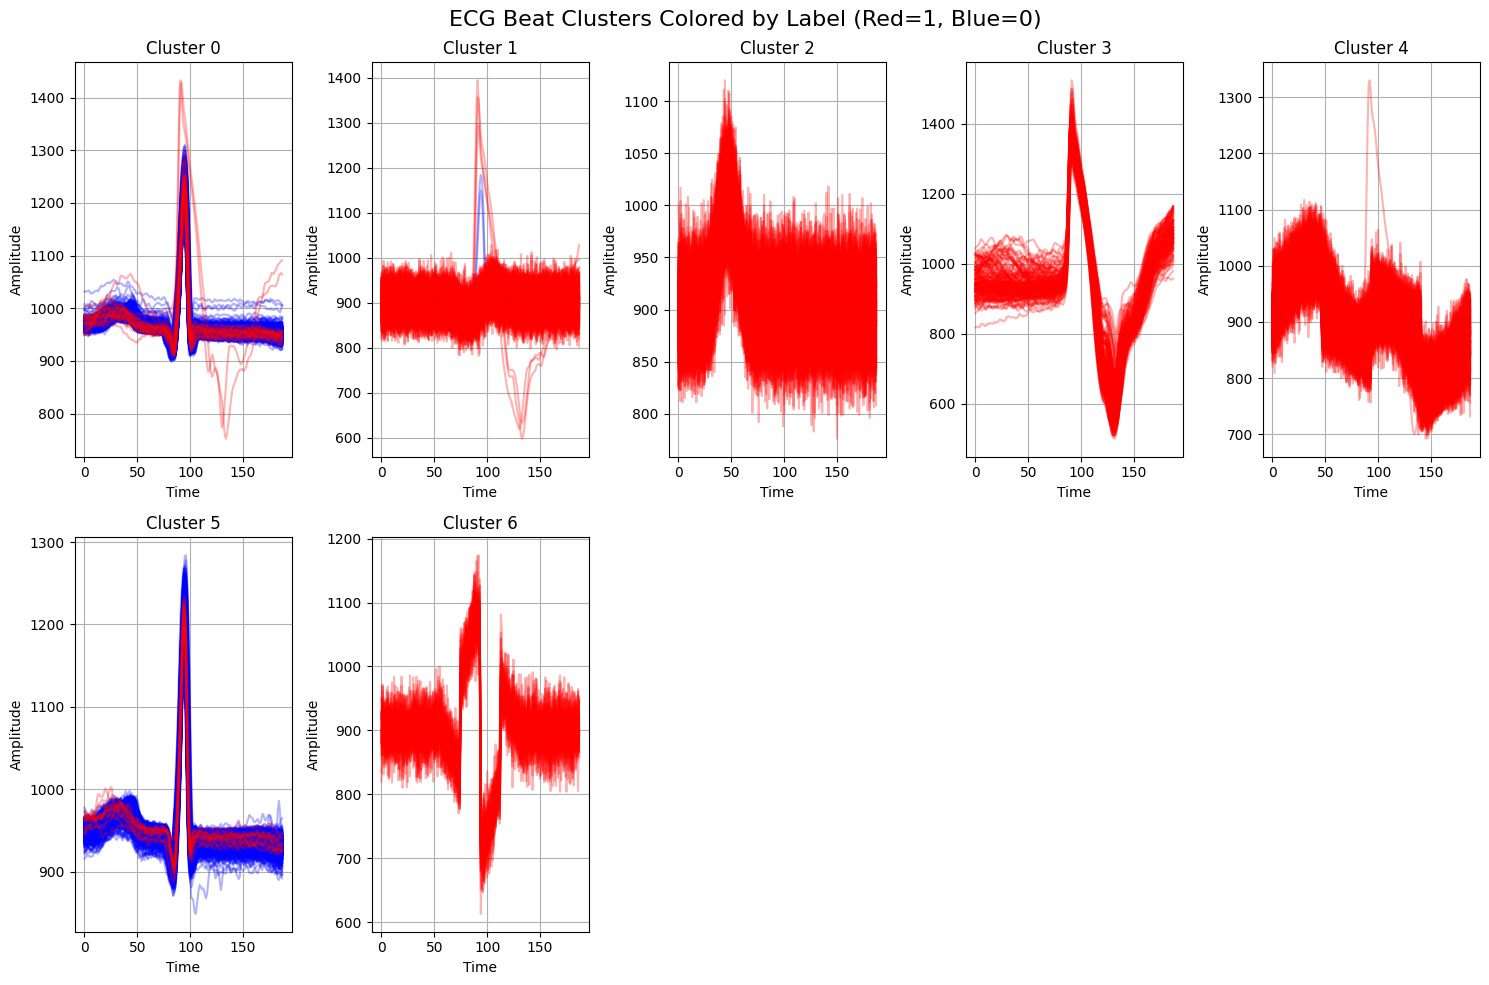

In [14]:
X1 = df.iloc[:, :-1].values
y1 = df.iloc[:, -1].values 

#normalization (may be deleted)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(15, 10))
for cluster_id in range(n_clusters):
    rows = (n_clusters + 4) // 5
    plt.subplot(rows, 5, cluster_id + 1)
    cluster_indices = np.where(clusters == cluster_id)[0]
    
    for idx in cluster_indices:
        color = 'red' if y1[idx] == 1 else 'blue'
        plt.plot(X1[idx], color=color, alpha=0.3)

    plt.title(f'Cluster {cluster_id}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.suptitle('ECG Beat Clusters Colored by Label (Red=1, Blue=0)', fontsize=16)
plt.tight_layout()
plt.show()


# PCA Dimension Reduction

In [15]:
#PCA dimension reduction
print(df.columns.tolist())
X = df.drop('label', axis=1)
y = df['label']

#Feature Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Implement PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138

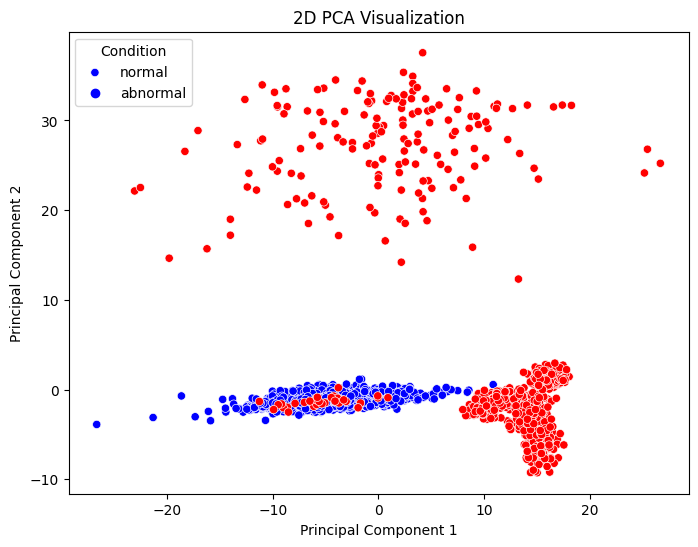

In [16]:
#PCA result
plt.figure(figsize=(8,6))
custom_palette = {0: 'blue', 1: 'red'}
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=custom_palette)
y_labels = {0: 'normal', 1: 'abnormal'}
plt.legend(title='Condition', labels=['normal', 'abnormal'])
plt.title("2D PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Data Preparation

In [17]:
#Dataset Preparation
X = df.drop('label', axis=1).values
y = df['label'].values

In [18]:
#1 dimension only since ECG data is 1 dimensional (Voltage against time)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [19]:
#Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [20]:
#Spiting DS
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Model Definition

In [21]:
#1Conv Train
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753511387.755812      18 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1753511387.756494      18 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 184, 64)             │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 92, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 92, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 88, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 44, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 44, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5632)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         721,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 762,754 (2.91 MB)

 Trainable params: 762,754 (2.91 MB)

 Non-trainable params: 0 (0.00 B)

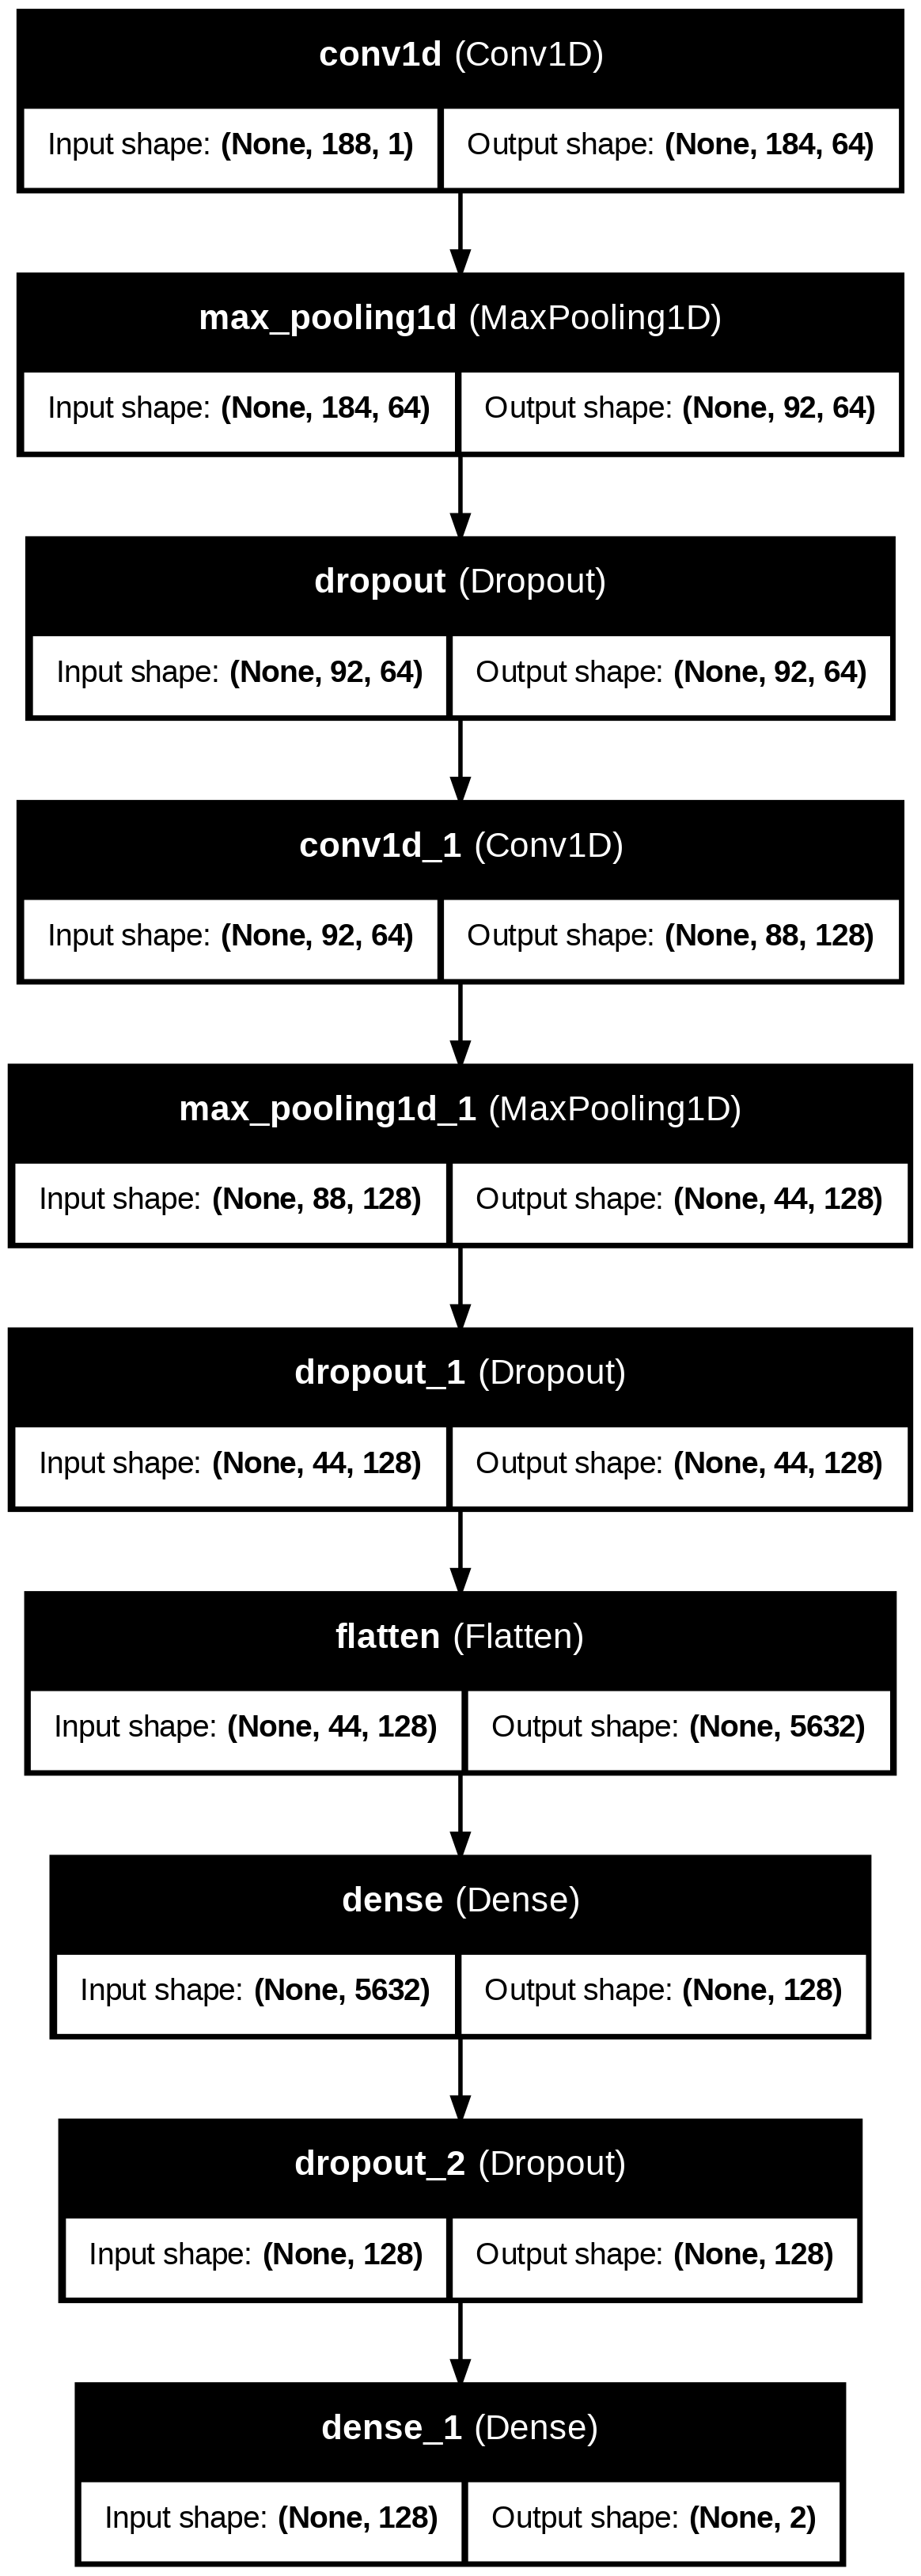

In [22]:
#save model visual to output
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/kaggle/working/model.png', show_shapes=True, show_layer_names=True)

# Model Training

In [23]:
#checkpoint to get best model only
checkpoint = ModelCheckpoint(
    '/kaggle/working/ecg_best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)
#train
model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint]
)

Epoch 1/500


I0000 00:00:1753511392.143202      84 service.cc:148] XLA service 0x7cbef8004c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753511392.143684      84 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1753511392.143707      84 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1753511392.462240      84 cuda_dnn.cc:529] Loaded cuDNN version 90300


45/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5984 - loss: 65.9057

I0000 00:00:1753511396.332450      84 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6031 - loss: 46.6345
Epoch 1: val_loss improved from inf to 0.59444, saving model to /kaggle/working/ecg_best_model.h5
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.6033 - loss: 46.2588 - val_accuracy: 0.7166 - val_loss: 0.5944
Epoch 2/500
69/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6931 - loss: 0.6268
Epoch 2: val_loss did not improve from 0.59444
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6939 - loss: 0.6264 - val_accuracy: 0.7166 - val_loss: 0.6406
Epoch 3/500
65/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7047 - loss: 0.6059
Epoch 3: val_loss did not improve from 0.59444
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7048 - loss: 0.6038 - val_accuracy: 0.7166 - val_loss: 0.6055
Epoch 4/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss: 0.6116
Epoch 4: val_loss improved from 0.59444 to 0.56986, saving model to /kaggle/working/ecg_best_model.h5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0

# Evaluation

In [24]:
#Accuracy
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi: {acc:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0641 
Akurasi: 0.9873


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


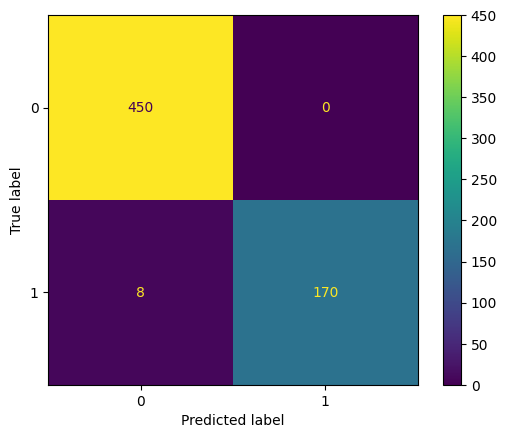

In [25]:
#Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


# Prediction

In [26]:
#Prediction
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


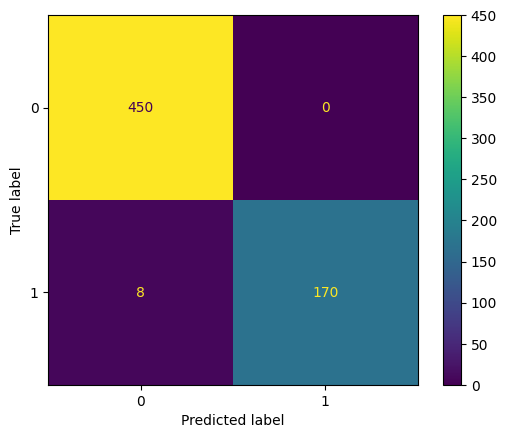

In [27]:
#Prediction confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_classes, y_pred_classes)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()

# Final Report

In [28]:
#Clarification Report
from sklearn.metrics import classification_report
target_names = [str(label) for label in le.classes_]
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       450
           1       1.00      0.96      0.98       178

    accuracy                           0.99       628
   macro avg       0.99      0.98      0.98       628
weighted avg       0.99      0.99      0.99       628



In [29]:
#ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9754


# Prediction

In [30]:
#Data for Testing
data = [
    952, 954, 956, 955, 955, 953, 952, 952, 951, 955, 953, 954, 952, 953, 952, 955,
    957, 958, 958, 962, 963, 964, 963, 965, 963, 967, 969, 971, 973, 973, 972, 971,
    973, 973, 972, 968, 966, 968, 970, 973, 969, 966, 960, 964, 965, 970, 971, 970,
    967, 964, 962, 961, 960, 954, 950, 951, 951, 951, 950, 950, 950, 948, 952, 949,
    949, 944, 940, 943, 944, 947, 948, 944, 941, 943, 945, 945, 945, 942, 938, 936,
    933, 926, 927, 920, 910, 909, 919, 940, 963, 986, 1020, 1068, 1121, 1167, 1193,
    1201, 1182, 1136, 1069, 1010, 967, 939, 924, 914, 917, 924, 931, 934, 934, 937,
    940, 942, 942, 941, 940, 939, 940, 938, 938, 936, 934, 934, 938, 938, 938, 935,
    935, 936, 939, 938, 938, 939, 935, 935, 938, 937, 937, 935, 935, 937, 938, 939,
    938, 938, 936, 940, 938, 939, 938, 936, 936, 938, 938, 941, 939, 938, 933, 935,
    935, 938, 938, 936, 936, 937, 938, 941, 941, 939, 939, 940, 943, 943, 941, 941,
    939, 938, 943, 943, 943, 943, 938, 941, 942, 941, 938, 935, 931, 932
]
data_category = 0


In [31]:
#Predict Function
def predict(signal):
    signal = np.array(data)
    # signal = (signal - np.mean(signal)) / np.std(signal) #Input normalization
    signal = signal.reshape(1, -1, 1)
    y_pred = model.predict(signal)
    predicted_class = np.argmax(y_pred)
    predicted_label = le.inverse_transform([predicted_class])[0]
    print(f"Prediction Result: {predicted_label}, expected to be: {data_category}")
    

In [32]:
predict(data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
Prediction Result: 0, expected to be: 0


# Save Model

In [33]:
model.save('/kaggle/working/ecg_last_model.h5')